<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li></ul></div>

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load data

In [4]:
df = pd.read_csv('../data/AirPassengers.csv')

In [5]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df['fecha'] = pd.to_datetime(df['Month'])

In [9]:
df.rename(columns={'#Passengers':'passengers'}, inplace=True)

In [10]:
df.head()

,Month,passengers,fecha
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [11]:
ts = df.set_index('fecha')

In [12]:
ts


,Month,passengers
fecha,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121
...,...,...
1960-08-01,1960-08,606
1960-09-01,1960-09,508
1960-10-01,1960-10,461


In [14]:
ts.loc['1960']

,Month,passengers
fecha,,
1960-01-01,1960-01,417
1960-02-01,1960-02,391
1960-03-01,1960-03,419
1960-04-01,1960-04,461
1960-05-01,1960-05,472
1960-06-01,1960-06,535
1960-07-01,1960-07,622
1960-08-01,1960-08,606
1960-09-01,1960-09,508


In [16]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:xlabel='fecha'>

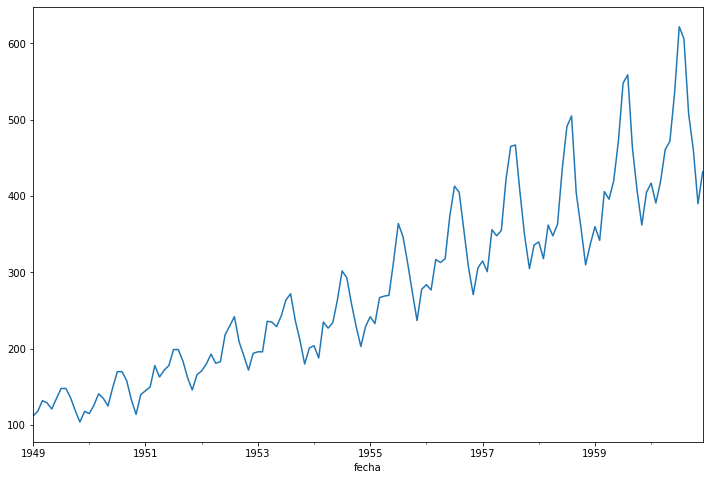

In [17]:
ts['passengers'].plot()

In [18]:
ts.drop('Month', axis=1, inplace=True)

In [19]:
ts

,passengers
fecha,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [21]:
decomposition = seasonal_decompose(ts)

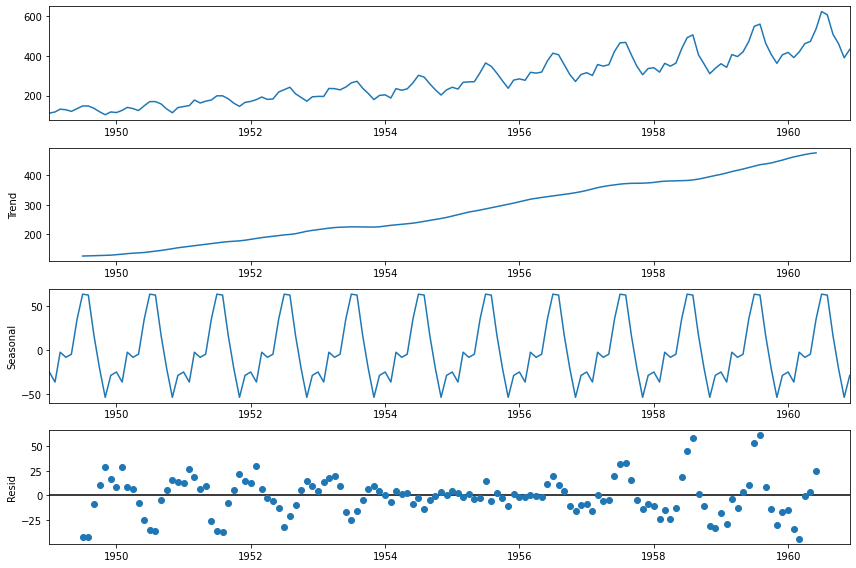

In [23]:
_ = decomposition.plot()

In [24]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

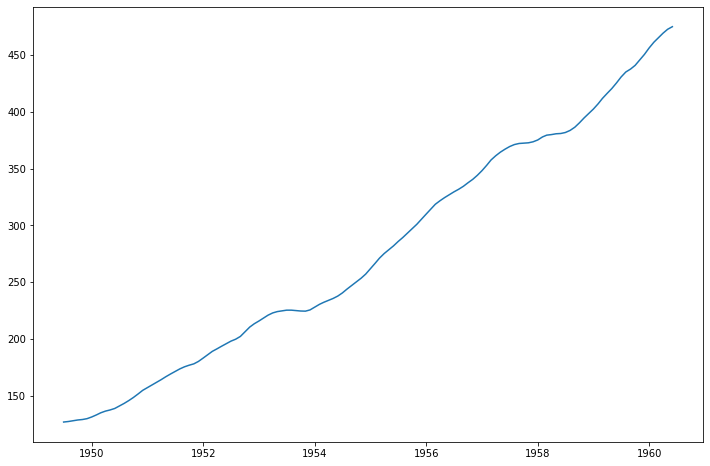

In [25]:
plt.plot(decomposition.trend)

<AxesSubplot:xlabel='fecha'>

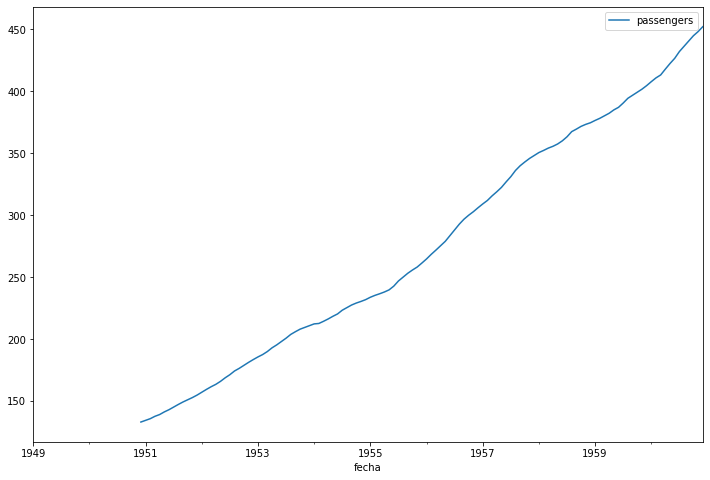

In [29]:
ts.rolling(24).mean().plot()

<AxesSubplot:xlabel='fecha'>

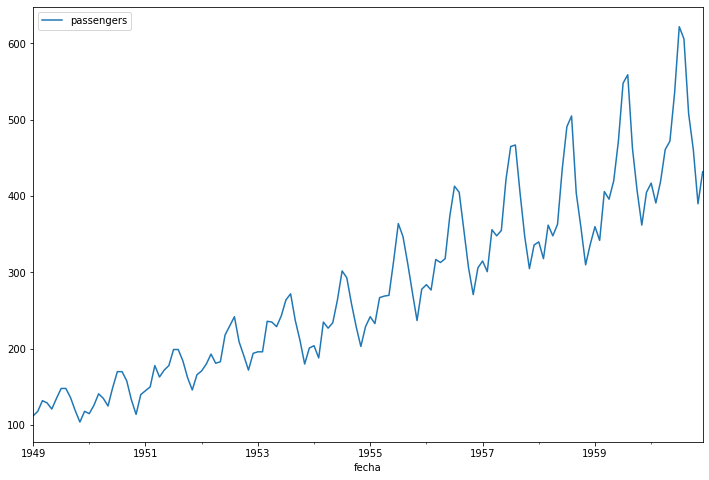

In [30]:
ts.plot()

In [31]:
adfuller(ts)

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [32]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

<AxesSubplot:xlabel='fecha'>

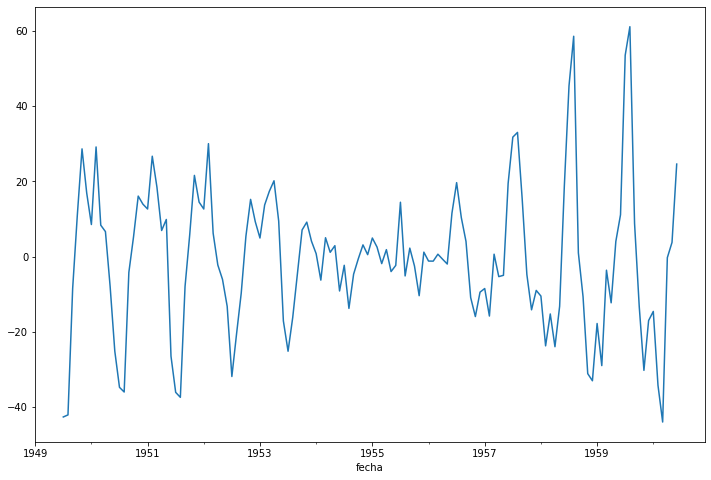

In [33]:
decomposition.resid

In [35]:
adfuller(decomposition.resid.dropna())

(-5.298427587050735,
 5.516868902226193e-06,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 849.940140147128)

In [38]:
adfuller(ts.diff(2).dropna())

(-2.9616951355554186,
 0.03862975767698898,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

<AxesSubplot:xlabel='fecha'>

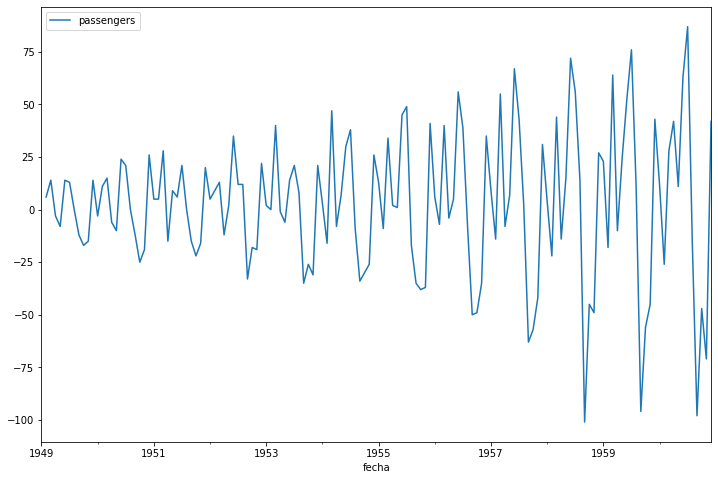

In [40]:
ts.diff(1).plot()

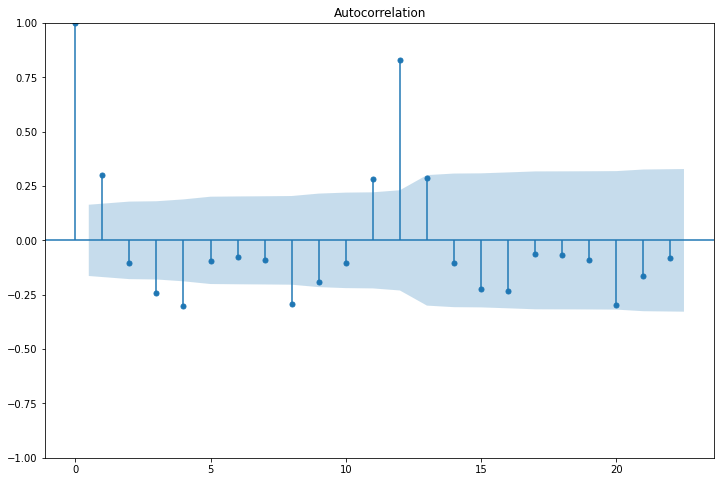

In [44]:
_ = plot_acf(ts.diff().dropna())

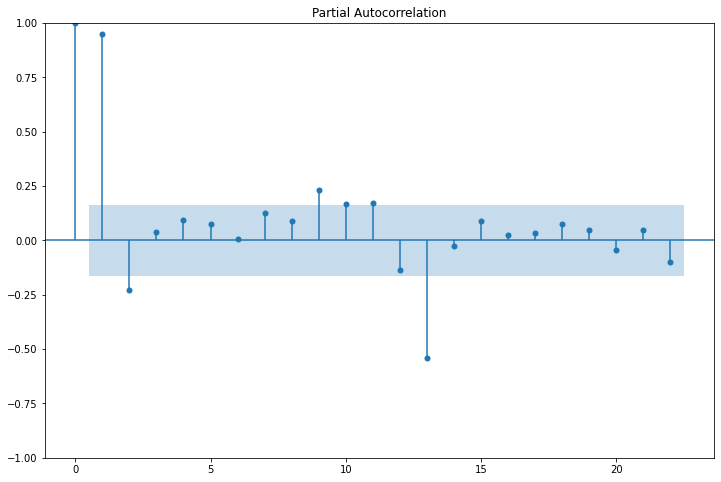

In [46]:
_ = plot_pacf(ts, method='ywm')

In [47]:
help(SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)
 |  
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA p

In [52]:
model = SARIMAX(ts,
                 order=(2,1,2),
                 seasonal_order=(2,1,2,12),
                 freq='MS'
                 
                 )

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
results = model.fit(maxiter=100)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51680D+00    |proj g|=  9.55359D-02

At iterate    5    f=  3.50475D+00    |proj g|=  1.89299D-02

At iterate   10    f=  3.49623D+00    |proj g|=  4.29030D-02

At iterate   15    f=  3.48495D+00    |proj g|=  7.24142D-03

At iterate   20    f=  3.47970D+00    |proj g|=  1.27455D-02

At iterate   25    f=  3.47870D+00    |proj g|=  1.25640D-03

At iterate   30    f=  3.47776D+00    |proj g|=  5.82911D-03

At iterate   35    f=  3.47330D+00    |proj g|=  2.90770D-02

At iterate   40    f=  3.46774D+00    |proj g|=  5.27920D-02

At iterate   45    f=  3.46332D+00    |proj g|=  4.53609D-03

At iterate   50    f=  3.45999D+00    |proj g|=  9.71792D-03

At iterate   55    f=  3.45950D+00    |proj g|=  4.84441D-03

At iterate   60    f=  3.45928D+00    |proj g|=  2.25292D-03

At iterate   65    f=  3.4

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -498.046
Date:                            Sat, 15 Jan 2022   AIC                           1014.093
Time:                                    12:00:00   BIC                           1039.969
Sample:                                01-01-1949   HQIC                          1024.607
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5778      0.439      1.315      0.189      -0.284       1.439
ar.L2          0.2245      0.346      0.649      0.516      -0.453       0.902
ma.L1         -1.0198      0.425     -2.400      0.016      -1.853      -0.187
ma.L2          0.0397      0.414      0.096      0.924      -0.772       0.851
ar.S.L12       1.3983      0.430      3.250      0.001       0.555       2.241
ar.S.L24      -0.4805      0.548     -0.878      0.380      -1.554       0.593
ma.S.L12      -1.8042     15.214     -0.119      0.906     -31.622      28.014
ma.S.L24       0.9922     16.903      0.059      0.953     -32.136      34.120
sigma2        92.7009   1523.396      0.061      0.951   -2893.100    3078.502
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                15.67
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.62   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
ts.tail()

,passengers
fecha,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


<AxesSubplot:>

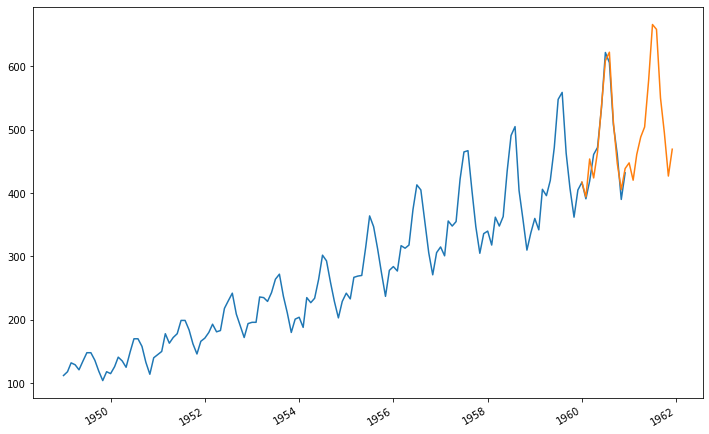

In [66]:
plt.plot(ts)
results.get_prediction(start='1960-01-01', end='1961-12-01').predicted_mean.plot()

In [67]:
from pmdarima import auto_arima

In [68]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [71]:
model = auto_arima(ts, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [70]:
model

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [72]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_exog',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_warn_for_older_version',
 'aic',
 'aicc',
 'arima_res_',
 'arparams',
 'arroots',
 'bic',
 'bse',
 'conf_int',
 'df_model',
 'df_resid',
 'fit',
 'fit_predict',
 'fit_with_exog_',
 'get_params',
 'hqic',
 'maparams',
 'maroots',
 'maxiter',
 'method',
 'nobs_',
 'oob',
 'oob_',
 'oob_preds_',
 'order',
 'out_of_sample_size',
 'params',
 'pkg_version_',


In [73]:
help(model.predict)

Help on method predict in module pmdarima.arima.arima:

predict(n_periods=10, X=None, return_conf_int=False, alpha=0.05, **kwargs) method of pmdarima.arima.arima.ARIMA instance
    Forecast future values
    
    Generate predictions (forecasts) ``n_periods`` in the future.
    Note that if ``exogenous`` variables were used in the model fit, they
    will be expected for the predict procedure and will fail otherwise.
    
    Parameters
    ----------
    n_periods : int, optional (default=10)
        The number of periods in the future to forecast.
    
    X : array-like, shape=[n_obs, n_vars], optional (default=None)
        An optional 2-d array of exogenous variables. If provided, these
        variables are used as additional features in the regression
        operation. This should not include a constant or trend. Note that
        if an ``ARIMA`` is fit on exogenous features, it must be provided
        exogenous features for making predictions.
    
    return_conf_int : bool,

In [79]:
pred = model.predict(n_periods=12)

<AxesSubplot:>

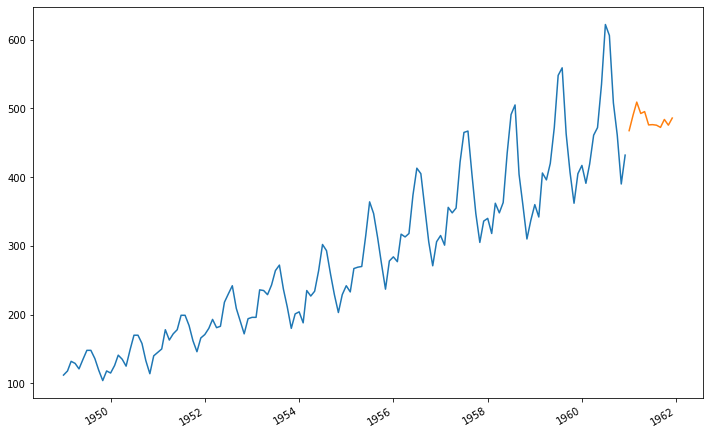

In [82]:
plt.plot(ts)
pd.Series(pred, 
          index=pd.date_range(start='1961-01-01', 
                              end='1961-12-01', 
                              freq='MS')).plot()

In [76]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize: 'bool' = False, name: 'Hashable' = None, closed=None, **kwargs) -> 'DatetimeIndex'
    Return a fixed frequency DatetimeIndex.
    
    Returns the range of equally spaced time points (where the difference between any
    two adjacent points is specified by the given frequency) such that they all
    satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
    the first and last time points in that range that fall on the boundary of ``freq``
    (if given as a frequency string) or that are valid for ``freq`` (if given as a
    :class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
    ``end``, or ``freq`` is *not* specified, this missing parameter can be computed
    given ``periods``, the number of timesteps in the range. See the note below.)
    
    Parameters
    ----------
    start : str or

In [83]:
from prophet import Prophet

In [84]:
model = Prophet()

In [85]:
help(model.fit)

Help on method fit in module prophet.forecaster:

fit(df, **kwargs) method of prophet.forecaster.Prophet instance
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Returns
    

In [88]:
df = ts.reset_index().rename(columns={'fecha':'ds', 'passengers':'y'})

In [89]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [90]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        401.66   1.79041e-05       55.4697           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159         401.8   7.30906e-05       77.6891   1.072e-06       0.001      246  LS failed, Hessian reset 
     181       401.805   1.83883e-05       54.9427   2.747e-07       0.001      307  LS failed, Hessian reset 
     199       401.806   4.36665e-07       56.9097      0.1579           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        401.86   1.34499e-06       66.5975           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     382       401.861   4.08281e-08       80.1649      0.1685           1      567   
Optimization terminated normally: 
  Convergence detected: rel

In [98]:
ts.head()

,passengers
fecha,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [106]:
yhat = model.predict(df).yhat


In [107]:
len(yhat)

144

In [108]:
pd.date_range(start='1949-01-01',
                                      end='1960-12-01', freq='MS')

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [111]:
yhat

0       84.827140
1       78.245570
2      110.395070
3      107.893153
4      111.401366
          ...    
139    540.351156
140    491.388072
141    456.562791
142    421.817353
143    450.964376
Name: yhat, Length: 144, dtype: float64

In [120]:
y_pred = pd.DataFrame({'y':yhat,
              'ds': pd.date_range(start='1949-01-01',end='1960-12-01', freq='MS')}).set_index('ds')

In [115]:
pd.Series(data=yhat, index = pd.date_range(start='1949-01-01',end='1960-12-01', freq='MS'))


1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Freq: MS, Name: yhat, Length: 144, dtype: float64

In [112]:
 pd.Series(yhat)

0       84.827140
1       78.245570
2      110.395070
3      107.893153
4      111.401366
          ...    
139    540.351156
140    491.388072
141    456.562791
142    421.817353
143    450.964376
Name: yhat, Length: 144, dtype: float64

In [ ]:
pd.DataFrame()

In [ ]:
model.predict()

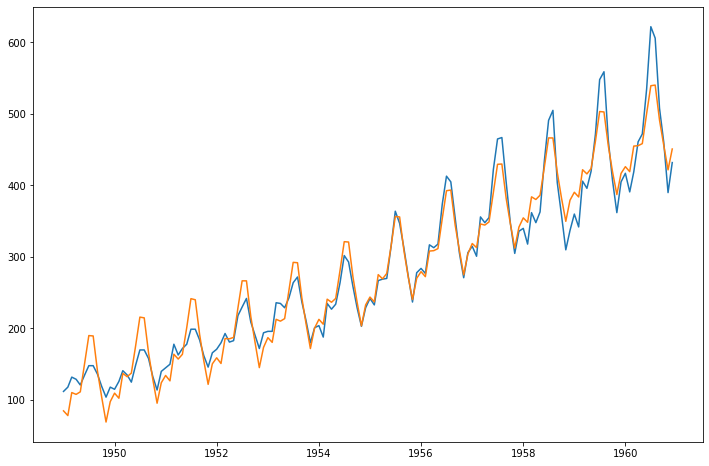

In [121]:
plt.plot(ts)
plt.plot(y_pred)

In [122]:
help(model.predict)

Help on method predict in module prophet.forecaster:

predict(df=None) method of prophet.forecaster.Prophet instance
    Predict using the prophet model.
    
    Parameters
    ----------
    df: pd.DataFrame with dates for predictions (column ds), and capacity
        (column cap) if logistic growth. If not provided, predictions are
        made on the history.
    
    Returns
    -------
    A pd.DataFrame with the forecast components.



In [125]:
ds = pd.DataFrame({'ds': pd.date_range(start='1960-01-01',
                                  end='1961-12-01', freq='MS')})

In [128]:
yhat = model.predict(ds).yhat

In [129]:
ds['y_pred'] = yhat

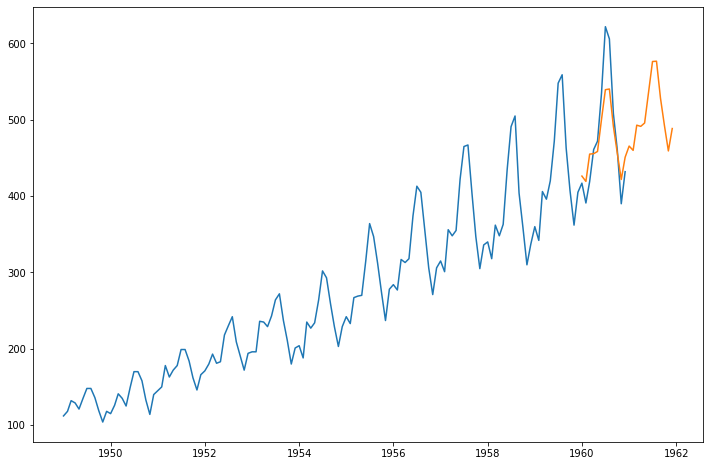

In [131]:
plt.plot(ts)
plt.plot(ds.set_index('ds'))

In [132]:
model.predict(ds)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,450.758556,399.854529,454.356262,450.758556,450.758556,-24.498910,-24.498910,-24.498910,-24.498910,-24.498910,-24.498910,0.0,0.0,0.0,426.259646
1,1960-02-01,453.873176,390.083641,447.754455,453.873176,453.873176,-34.593999,-34.593999,-34.593999,-34.593999,-34.593999,-34.593999,0.0,0.0,0.0,419.279176
2,1960-03-01,456.786853,425.350015,482.454265,456.786853,456.786853,-1.737026,-1.737026,-1.737026,-1.737026,-1.737026,-1.737026,0.0,0.0,0.0,455.049827
3,1960-04-01,459.901473,428.658651,483.046396,459.901473,459.901473,-4.289615,-4.289615,-4.289615,-4.289615,-4.289615,-4.289615,0.0,0.0,0.0,455.611858
4,1960-05-01,462.915621,430.389239,485.701863,462.915621,462.915621,-4.423535,-4.423535,-4.423535,-4.423535,-4.423535,-4.423535,0.0,0.0,0.0,458.492086
5,1960-06-01,466.030241,471.130162,529.833383,466.030241,466.030241,34.647286,34.647286,34.647286,34.647286,34.647286,34.647286,0.0,0.0,0.0,500.677528
6,1960-07-01,469.044389,512.364103,568.333221,469.044389,469.044389,70.396922,70.396922,70.396922,70.396922,70.396922,70.396922,0.0,0.0,0.0,539.441311
7,1960-08-01,472.159009,512.711587,566.046815,472.159009,472.159009,68.192146,68.192146,68.192146,68.192146,68.192146,68.192146,0.0,0.0,0.0,540.351156
8,1960-09-01,475.273629,461.469597,519.282062,475.273629,475.273629,16.114443,16.114443,16.114443,16.114443,16.114443,16.114443,0.0,0.0,0.0,491.388072
9,1960-10-01,478.287778,428.823496,482.990407,478.287778,478.287778,-21.724987,-21.724987,-21.724987,-21.724987,-21.724987,-21.724987,0.0,0.0,0.0,456.562791
